In [1]:
from __future__ import print_function
from shapely.ops import cascaded_union
import geopandas as gpd
import descartes
import shapely.geometry as shy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import random
import igl
import math
import tripy
import networkx as nx
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib.pyplot import figure
colors= np.array(['#85C17E','#E2BC74','#425B8A','#B666D2','#9393b3','#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E'   ])
colors = np.array(['#FFF8DC', '#FFEBCD','#FFE4C4','#FFDEAD','#F5DEB3','#DEB887','#D2B48C','#BC8F8F','#F4A460','#DAA520','#B8860B','#CD853F','#D2691E','#8B4513','#A52A2A','#800000'])
colors = np.array(['#FFE4C4','#BC8F8F','#CD853F','#D2691E','#8B4513','#A52A2A','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F'])

#colors = np.array(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
import copy
from numpy import linalg as LA
epsilon=1e-5
from shapely.geometry import Point, MultiPoint

# part triangulation Functions

            

In [2]:
def triangulate(figure):
    result = np.array([tripy.earclip(figure[i]) for i in range(len(figure))])
    return result
def display_triangulated_shape(triangles):
    patches = []
    xmax=0
    ymax=0
    fig = plt.figure(num=None, figsize=(10, 10))
    ax = fig.gca()
    for i in range(len(triangles)):
        polygon = Polygon(triangles[i], fill=True,edgecolor='black',label='figure'+str(i))
        ax.add_artist(polygon)
    ax.set(xlim=(0, 1000), ylim=(0, 600))
    plt.show()
    


# parts display function

In [3]:
def displayTriangleStable(figure, v, k=0): 
    clone = copy.deepcopy(figure)
    def update(i=0):
        patches = []
        xmax=20
        ymax=5
        xmin = 0
        ymin= -20
        k=0
        fig2 = plt.figure(num=None, figsize=(8, 8))
        ax2 = fig2.gca()
        if(v.size>0):
            for k in range(len(figure)):
                for l in range(len(figure[k])):
                    clone[k][l][0]=figure[k][l][0] + i * v[2*k] 
                    clone[k][l][1]=figure[k][l][1] + i * v[2*k+1]

        for i in range(len(figure)):
            polygon = Polygon(clone[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
            ax2.add_artist(polygon)

        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            

    interact(update,i=FloatSlider(min=0, max=1000, step=10))
def displayPolygonsStable(figure, v, k=0): 
    clone = copy.deepcopy(figure)
    def update(i=0):
        patches = []
        xmax=2800
        ymax=2800
        xmin = -0
        ymin=-0
        k=0
        fig2 = plt.figure(num=None, figsize=(8, 8))
        ax2 = fig2.gca()
        if(v.size>0):
            for k in range(len(figure)):
                for l in range(len(figure[k])):
                    clone[k][l][0]=figure[k][l][0] + i * v[2*k] 
                    clone[k][l][1]=figure[k][l][1] + i * v[2*k+1]

        for i in range(len(figure)):
            fig2.figimage("ressources/out"+str(i)+".png")

        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            

    interact(update,i=FloatSlider(min=0, max=1000, step=10))
def displayPolygons(figure, v, k=0): 
    clone = copy.deepcopy(figure)
    def update(i=0):
        patches = []
        xmax=0
        ymax=0
        xmin =0
        ymin=0
        k=0
        fig2 = plt.figure(num=None, figsize=(8, 8))
        ax2 = fig2.gca()
        if(v.size>0):
            for k in range(len(figure)):
                for l in range(len(figure[k])):
                    clone[k][l][0]=figure[k][l][0] + i * v[2*k] 
                    clone[k][l][1]=figure[k][l][1] + i * v[2*k+1]

        for i in range(len(figure)):
            polygon = Polygon(clone[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
            ax2.add_artist(polygon)
            if(xmax<np.max(clone[i][:,0])):
                xmax=np.max(clone[i][:,0])
            if(ymax<np.max(clone[i][:,1])):
                ymax=np.max(clone[i][:,1])
            if(xmin>np.min(clone[i][:,0])):
                xmin=np.min(clone[i][:,0])
            if(ymin>np.min(clone[i][:,1])):
                ymin=np.min(clone[i][:,1])
        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            

    interact(update,i=FloatSlider(min=0, max=10, step=0.1))
def simpleDisplay(figure):
    patches = []
    xmax=0
    ymax=0
    xmin =0
    ymin=0
    k=0
    fig2 = plt.figure(num=None, figsize=(8, 8))
    ax2 = fig2.gca()
    for i in range(len(figure)):
        polygon = Polygon(figure[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
        ax2.add_artist(polygon)
        if(xmax<np.max(figure[i][:,0])):
            xmax=np.max(figure[i][:,0])
        if(ymax<np.max(figure[i][:,1])):
            ymax=np.max(figure[i][:,1])
        if(xmin>np.min(figure[i][:,0])):
            xmin=np.min(figure[i][:,0])
        if(ymin>np.min(figure[i][:,1])):
            ymin=np.min(figure[i][:,1])
        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    plt.show()

# normals computing functions

In [4]:
def cross(a,b):
    return a[0]*b[1]-b[0]*a[1]

def is_between(a, b, c): # is point c between point a and b
    if(np.allclose(a,c) or np.allclose(b,c)):
        return False
    cross_product= cross((c-a),(b-a))
    if abs(cross_product) > epsilon:
        return False
    dotproduct = (b-a)@(c-a)
    if dotproduct < 0:
        return False
    squaredlengthba = np.sum(np.square(b-a))
    if dotproduct > squaredlengthba:
        return False
    return True

def isTouching(v1,v2, u1,u2):
    if((np.allclose(v1,u1) and np.allclose(v2,u2)) or  (np.allclose(v2,u1) and np.allclose(v1,u2))):
        return True
    return abs(cross(v1-v2, u1-u2)) < epsilon and (is_between(v1,v2,u1) or is_between(v1,v2,u2) or is_between(u1,u2,v1) or is_between(u1,u2,v2))  
def compute_normal_edge(v1,v2,i,j):
    normal = np.array(v2-v1)
    normal[0], normal[1] = normal[1], -normal[0]
    normal = normal / LA.norm(normal)
    return np.around(np.array(normal), decimals = 1)

def compute_normals_shape(shape):
    normals_of_shape= np.array([compute_normal_edge(shape[i],shape[(i+1)%len(shape)]) for i in range(len(shape))])
    return normals_of_shape

def compute_normals_2_shapes(shape1, shape2): 
    result = np.array([compute_normal_edge(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)]) for i in range (len(shape1)) for j in range (len(shape2)) if(isTouching(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)]))])   
    return set(tuple(i) for i in result)

def compute_normals_dict(figure):
    normals_dic = {}
    for i in range(len(figure)):
        for j in range(len(figure)):
            if(i != j):
                normals_dic[i,j]= compute_normals_2_shapes(figure[i], figure[j])
    return normals_dic

# inequation solver functions

In [5]:

def construct_A(figure):
    normals= compute_normals_dict(figure)
    count=0
    for x in normals: 
        count += len(normals[x]) 
    A = np.zeros((count,  len(figure)*2))
    c=0
    for x in normals:
        for j in range(len(normals[x])):
            a= list(normals[x])
            A[c][2*list(x)[0]]=-a[j][0]
            A[c][2*list(x)[0]+1]=-a[j][1]
            A[c][2*list(x)[1]]=a[j][0]
            A[c][2*list(x)[1]+1]=a[j][1]

            c=c+1
    return np.unique(A, axis=0)

def solver(A, i): #fixes all velocities except the i part to 0
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))
    index=np.arange(len(A[0]))
    index= np.delete(index, 2*i)
    index= np.delete(index, 2*i)

    constraints = [(A*x-tij)>=np.zeros(len(A)), x[index]==0, tij>=0, tij<=1]

    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

def solver_2(A, i,n, iskey=False,): #fixes only one reference part pr velocity to 0
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))    
    if(iskey and n>2):
        constraints = [(A*x-tij)>=np.zeros(len(A)), x[(i+1)%len(A[0])]==0, x[i]==0, tij>=0, tij<=1]
    elif(n<=2):
        constraints = [(A*x-tij)>=np.zeros(len(A)),  tij>=0, tij<=1]
    else:
        constraints = [(A*x-tij)>=np.zeros(len(A)), x[(i+1)%len(A[0])]==0, tij>=0, tij<=1]

    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

def solverMultipleMoving(A):
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))    
    
    constraints = [(A*x-tij)>=np.zeros(len(A)),x[0]==0, x[3]==0, tij>=0, tij<=1]
    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

# testing functions

In [6]:
def interlocking_test(figure, allVelocitiesFixed = True, key=None):
    A=construct_A(figure)
    final_v = np.array([])
    max_tij = np.zeros(len(A)) 
    
    for i in range(len(figure)):
        if(allVelocitiesFixed):
            temp_tij, v = solver(A, i)
        else:
            if(key is not None):
                temp_tij, v = solver_2(A, i,len(figure),True)
            else:
                temp_tij, v = solver_2(A, i,len(figure))

        if(np.sum(temp_tij) > np.sum(max_tij)):
            max_tij=temp_tij
            final_v=v
            
    return  max_tij, final_v   
def interlocking_test_moving(figure):
    A=construct_A(figure)
    final_v = np.array([])
    max_tij = np.zeros(len(A)) 
    temp_tij, v = solverMultipleMoving(A)
    if(np.sum(temp_tij) > np.sum(max_tij)):
        max_tij=temp_tij
        final_v=v

    return  max_tij, final_v   
def movingPieces(v):
    movingPieces=[]
    for i in range(len(v)//2):
        if(v[2*i]>0 or v[2*i+1]> 0):
            movingPieces.append(i)
    return movingPieces

def fullStudy(figure, display = 0):
    if(display == 0):
        tij, v= interlocking_test(figure, True)
        print(v)
        if(v.size>0):
            if(len(movingPieces(v))>1):
                displayPolygons(figure, v)
                return "non interlocking, figure {} are able to move together".format(movingPieces(v))
            else:
                print("only piece "+str(movingPieces(v))+" can move, it's the key")
                displayPolygons(figure,v)
                if(v.size!=0):
                    return "it is an interlocking assembly ( deadlocking if key is fixed)"

        else:
            displayPolygons(figure,v)
            return "deadlocking"
    else:
        tij, v= interlocking_test(figure, True)
        print(v)
        if(v.size>0):
            if(len(movingPieces(v))>1):
                displayPolygonsStable(figure, v)
                return "non interlocking, figure {} are able to move together".format(movingPieces(v))
            else:
                print("only piece "+str(movingPieces(v))+" can move, it's the key")
                displayPolygonsStable(figure,v)
                tij, v = interlocking_test(figure, False, movingPieces(v)[0])
                if(v.size!=0):
                    return "it is an interlocking assembly ( deadlocking if key is fixed)"

        else:
            displayPolygonsStable(figure,v)
        
    return "deadlocking"
def StudyMultipleMoving(figure, k=0):
    tij, v= interlocking_test_moving(figure)
    print(v)
    if(v.size>0):
            displayPolygonsStable(figure, v, k)
       
    else:
        displayPolygonsStable(figure,v, k)
        return "deadlocking"
              

# figure 1 test

In [7]:
#figure 1
p1 = np.array([[0,0], [400,0], [400,100],[100,100], [100,200], [200,300], [0,300]])
p2= np.array([[400,100],[400,300],[200,300],[100,200],[100,100]])
figure1= np.array([p1,p2])
fullStudy(figure1)

[-6.242 -2.254  0.     0.   ]
only piece [] can move, it's the key


interactive(children=(FloatSlider(value=0.0, description='i', max=10.0), Output()), _dom_classes=('widget-inte…

'it is an interlocking assembly ( deadlocking if key is fixed)'

# figure 2 test

In [9]:
#figure 2
f1= np.array([[0,600],[0,200],[200,200],[100,100],[300,100],[800,600]])
f2= np.array([[0 ,0],[1000,0],[1000 , 600],[800, 600],[700 ,500],[800, 500],[700 ,400],[1000 , 400],[800 ,200],[400, 200],[300 ,100],[100 ,100],[200 ,200],[  0 ,200]])
f3= np.array([[400,200],[800,200],[1000,400],[700,400],[600,300],[500,300]])
f4= np.array([[500,300],[600,300], [800,500],[700,500]])
figure2=np.array([f1,f2,f3,f4])
fullStudy(figure2)

[ 1.  1. -0.  0.  0. -0.  0. -0.]
only piece [0] can move, it's the key


interactive(children=(FloatSlider(value=0.0, description='i', max=10.0), Output()), _dom_classes=('widget-inte…

'it is an interlocking assembly ( deadlocking if key is fixed)'

# DeadLocking test

In [10]:
deadLockingPart1 = np.array([[0,0],[300,0],[300,200],[200,200],[200,100],[100,100],[100,400],[200,400],[200,300],[300,300],[300,500],[0,500]])
deadLockingPart2 = np.array([[300,0],[400,0],[400,500],[300,500],[300,300],[200,300],[200,400],[100,400],[100,100],[200,100],[200,200],[300,200]])

deadLockingFigure=np.array([deadLockingPart1,deadLockingPart2])
fullStudy(deadLockingFigure , 0)

[]


interactive(children=(FloatSlider(value=0.0, description='i', max=10.0), Output()), _dom_classes=('widget-inte…

'deadlocking'

# triangle test

In [11]:
v1, f1 = igl.read_triangle_mesh("ressources/3-way-triangle/tri1.obj")
v2, f2 = igl.read_triangle_mesh("ressources/3-way-triangle/tri2.obj")
v3, f3 = igl.read_triangle_mesh("ressources/3-way-triangle/tri3.obj")
v1=np.flip(np.delete(v1, np.s_[1], 1), 0)
v2=np.flip(np.delete(v2, np.s_[1], 1), 0)
v3=np.flip(np.delete(v3, np.s_[1], 1), 0)
figureTriangle=np.array([v1,v2,v3])


ValueError: File 'ressources/3-way-triangle/tri1.obj' not found.

In [19]:
StudyMultipleMoving(figureTriangle)

[ 0.    -1.016 -0.565 -0.     0.565 -0.   ]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

# DESIGNING PART

# designing 2D


In [20]:
def findMiddlePoints(piece, pointsIndices):
    boundaryCoordinates = list(piece.exterior.coords)
    middlePoints = []
    space = len(boundaryCoordinates) // 3
    

In [21]:
def createPieceFromPolygons(Ai):
    boundary = gpd.GeoSeries(cascaded_union(Ai))
    #boundary.plot(color = 'red')
    #plt.show()
    return boundary

def getCoordFromPolygon(polygon):
    d=shy.mapping(polygon)
    return (list(d.get('features')[0].get('geometry').get('coordinates')))

In [22]:
from descartes.patch import PolygonPatch
def simplePolygonDisplay(polygon):
    
    patches = []
    xmax=10
    ymax=10
    xmin =-10
    ymin=-10
    k=0
    fig2 = plt.figure(num=None, figsize=(10, 10))
    ax = fig2.gca()

    patch = PolygonPatch(polygon, facecolor=[0,0,0.5], edgecolor=[0,0,0], alpha=0.7, zorder=2)
    ax.add_patch(patch)
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()


In [23]:
def createFirstPart(piece, pointsIndices, center):
    totalArea = piece.area
    areaPerPart = totalArea/ len(pointsIndices)
    pieceCoords = list(piece.exterior.coords)
    numberIndices = len(list(pieceCoords))

    patchWork = pieceCoords + pieceCoords + pieceCoords
    spaces = [pointsIndices[i+1]-pointsIndices[i] for i in range(len(pointsIndices)-1) ]
    spaces.append(numberIndices-pointsIndices[-1]+ pointsIndices[0])
    
    firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[1]//2 ]
    
    firstPart.append(center)
    aug = 0
    augneg = 0
    partArea = shy.Polygon(firstPart).area        
    while(not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
        firstPart= firstPart[:-1]

        if (partArea< areaPerPart and pointsIndices[0]+spaces[1]//2+aug < pointsIndices[1] ):
            #print("augment a droite")
            aug = aug+1
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea< areaPerPart and (pointsIndices[0]-spaces[0]//2-augneg)  > pointsIndices[-1] -numberIndices):
            augneg = augneg+1
            #print("augment a gauche")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2-augneg:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea> areaPerPart and pointsIndices[0]+spaces[1]//2+aug > pointsIndices[0] ):
            aug = aug-1
            #print("decrease a droite")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea> areaPerPart and (pointsIndices[0]-spaces[0]//2-augneg)%numberIndices < pointsIndices[0] ):
            aug = augneg-1
            #print("decrease a gauche")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2-augneg:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        else:
            print(len(firstPart))
            return "impossible area of max piece is {} and min area required is {}".format( partArea, areaPerPart)
        firstPart.append(center)

        partArea = shy.Polygon(firstPart).area       
    
    return firstPart[:-1]

In [24]:
def fairSplit(piece, pointsIndices, center):
    firstPart = createFirstPart(piece, pointsIndices, center)
    
    totalArea = piece.area
    partsIndices = [(firstPart[0], firstPart[-1])]
    areaPerPart = totalArea/ len(pointsIndices)
    print(areaPerPart, "/", totalArea)
    pieceCoords = list(piece.exterior.coords)
    numberIndices = len(list(pieceCoords))

    patchWork = pieceCoords + pieceCoords + pieceCoords
    spaces = [pointsIndices[i+1]-pointsIndices[i] for i in range(len(pointsIndices)-1) ]
    spaces.append(numberIndices-pointsIndices[-1]+ pointsIndices[0])
    indicesPart = [(0,0) for i in range(len(pointsIndices))]
    indicesPart[0] = (pieceCoords.index(firstPart[0]), pieceCoords.index(firstPart[-1]))
    
    
    
    for i in range(len(pointsIndices)-2):
        i= i+1
        parti = patchWork[indicesPart[i-1][1]: pointsIndices[i]+1] 
        parti.append(center)
        aug = 0
        augneg = 0
        partArea = shy.Polygon(parti).area
        if(partArea > areaPerPart and not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
            return 0
        
        while(not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
            parti = parti[:-1]
            if (partArea< areaPerPart and pointsIndices[i]+1//2+aug < pointsIndices[i+1] ):
                #print("augment a droite")
                aug = aug+1
                parti = pieceCoords[indicesPart[i-1][1]:(pointsIndices[i]+1)+aug ]

            else:
                return "impossible area of max piece is {} and min area required is {}".format( partArea, areaPerPart)
            indicesPart[i]= (pieceCoords.index(parti[0]), pieceCoords.index(parti[-1]) )
            parti.append(center)
            partArea = shy.Polygon(parti).area    
            
    if(pieceCoords.index(firstPart[0]) > pieceCoords.index(firstPart[-1])):
        indicesPart[0] = (pieceCoords.index(firstPart[0])-len(pieceCoords), pieceCoords.index(firstPart[-1]))
    else:
        indicesPart[0] = (pieceCoords.index(firstPart[0]), pieceCoords.index(firstPart[-1]))
    
    indicesPart[-1]= (indicesPart[-2][1], indicesPart[0][0])
    fairPartSplit = []
    for i in range(len(indicesPart)-1):
        fairPartSplit.append(patchWork[indicesPart[i][0]+len(pieceCoords):indicesPart[i][1]+len(pieceCoords)+1])
        fairPartSplit[i].append(center)
        fairPartSplit[i] = np.array(fairPartSplit[i])
    fairPartSplit.append(patchWork[indicesPart[-1][0]+len(pieceCoords):indicesPart[-1][1]+2*len(pieceCoords)+1])
    fairPartSplit[-1].append(center)
    fairPartSplit[-1] = np.array(fairPartSplit[-1])
    simpleDisplay(np.array(fairPartSplit))
    return np.array(fairPartSplit)

In [25]:
def intersect(holes, joint):
    emptyPol = Point(0,0).buffer(1).intersection(Point(0,5).buffer(1))

    for i in range(len(holes)):
        if(holes[i].intersection(joint) != emptyPol):
            return True
    return False

In [26]:
def designJoint2(p1,p2,holes,  v, width, height, distance_to_center=0.5, center= [0,0] ):
    
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    v = np.asarray(v)
    nrows, ncols = p1.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [p1.dtype]}

    C = np.intersect1d(p1.view(dtype), p2.view(dtype))

    commonPoints = C.view(p1.dtype).reshape(-1, ncols) 

    commonPoints = [commonPoints[i] for i in range(len(commonPoints)) if not np.allclose(commonPoints[i], center)]
    otherPoint=commonPoints[0]

    midPoint = np.asarray((center+otherPoint)*distance_to_center)
    
    JointAxis = np.asarray((center-otherPoint)/np.linalg.norm(center-otherPoint))
    polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
    if(len(holes)!=0):
        i = 1
        while(intersect(holes, polyJoint)):
            distance_to_center = 1 - 0.2 *i
            i=i+1
            
            midPoint = np.asarray((center+otherPoint)*distance_to_center)
            polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
            if (i > 8):
                return "no non intersecting joint found"
    p1 = shy.Polygon(p1).difference(polyJoint)
    p2 = shy.Polygon(p2).union(polyJoint)
    
    return list(p1.exterior.coords), list(p2.exterior.coords)

In [27]:
print(np.random.rand(1))

[0.92769611]


In [28]:
def correctPoints(v1):
    v1 = np.round(np.flip(v1, 0),decimals=3)
    _, idx = np.unique(v1,axis = 0, return_index=True)
    return v1[np.sort(idx)]

In [29]:
def design(piece, vectors, pointsIndices,nParts=3, center = (0,0)): # enter a polygon piece, 3 vectors, 3points indices
    assert nParts == len(pointsIndices) and nParts == len(vectors), "number of points should match number of pieces and number of vectors"  
    for i in range(len(vectors)):
        vectors[i] = vectors[i]/np.linalg.norm(vectors[i])
    holes = piece[1:]
    width = 1
    height = 2
    parts  =[]
    directions = []
    fs = fairSplit(piece[0],pointsIndices, center )
    for part in fs:
        parts.append(part)
        
    for i in range(nParts):
        directions.append((vectors[i]-vectors[i-1])/np.linalg.norm(vectors[i]-vectors[i-1]) )
    
    for i in range(nParts):
        parts[i], parts[(i+1)%len(parts)] = designJoint2(parts[i], parts[(i+1)%len(parts)],holes,  directions[(i+1)%len(parts)], width, height, distance_to_center=0.5, center= [0,0] )

    for i in range(nParts):
        parts[i] = shy.Polygon(parts[i])
        for j in range(len(piece)-1):
            parts[i] = parts[i].difference(piece[j+1])
        
        parts[i] = list(parts[i].exterior.coords)
        
    for i in range(len(parts)):
        parts[i] = correctPoints(parts[i])
    
    
    
    return np.asarray(parts)
    
    
    
    
    
    

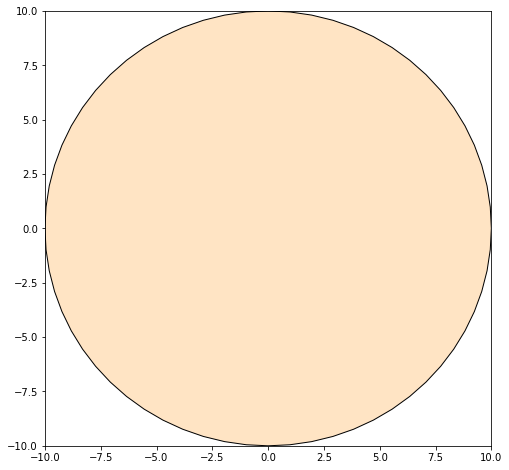

In [30]:
point = Point(0,0).buffer(10)
simpleDisplay(np.array([point.exterior.coords]))

104.55161635153131 / 313.6548490545939


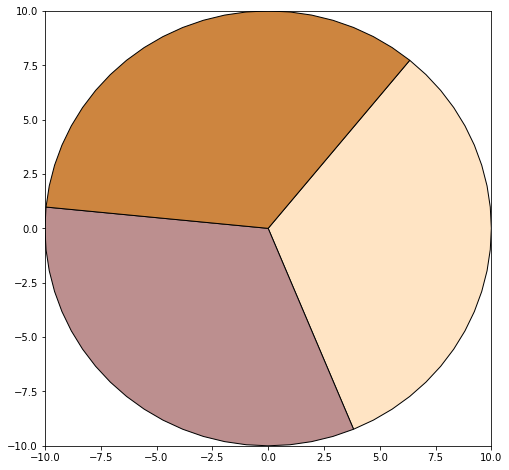

[ 0.     0.673 -1.515  0.    -1.072  1.477]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [31]:
point = np.array([Point(0,0).buffer(10)])
## def design(Polygon, [directionVectors], pointsIndices, numberofParts)
circle = design(point, np.array([[1, 0],[ -1, -1],[-0.2, 1]]), [0, 22, 44], 3)
StudyMultipleMoving(circle)

62.73096981091878 / 313.6548490545939


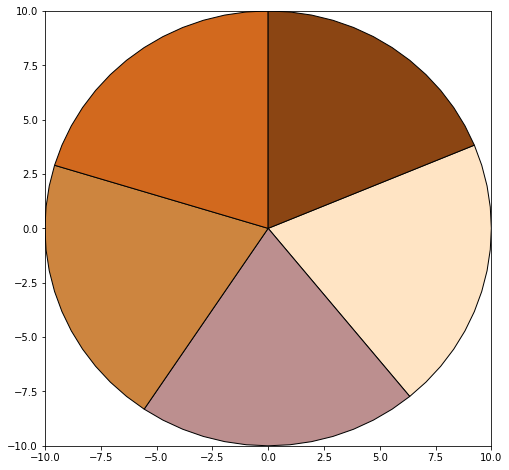

[-0.     2.734 -4.921 -0.    -5.582  1.981 -3.062  3.871 -0.853  3.871]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [32]:
a = Point(0,0).buffer(10)
circle5Parts= design(np.array([a]),np.array([[1, 0],[-0.5, -1],[-1, 0.5], [-0.2, 1],[0.5, 2]]), [0,12,24,36,54], nParts = 5)
StudyMultipleMoving(circle5Parts)


In [33]:
StudyMultipleMoving(baseGridArr)

NameError: name 'baseGridArr' is not defined

## 4-part eight

In [ ]:
h1 = Point(0,-12).buffer(16)
h2 = Point(0,12).buffer(16)
eight = h1.union(h2)
hole1 = Point(0,12).buffer(6)
hole2 = Point(0,-12).buffer(6)
eightDesign = design(np.array([eight, hole1, hole2]),
                     np.array([[1,     -1],[ -0.5  ,  -1],[ -1  ,  1 ], [1,1]]), [0,25,50,75], nParts = 4)
StudyMultipleMoving(eightDesign)



# https://gist.github.com/pv/8036995

# puzzle 2d design

In [66]:
def randomStructure(nPoints):
    np.random.seed(8)
    # make up data points
    points = list(500*np.random.rand(12, 2))
    points.append([0,0])
    points.append([500,0])
    points.append([0,500])
    points.append([500,500])
    
    vor = Voronoi(points)

    regions, vertices = voronoi_finite_polygons_2d(vor)

    pts = MultiPoint([Point(i) for i in points])
    
    mask = pts.convex_hull
    new_vertices = []
    for region in regions:
        polygon = vertices[region]
        shape = list(polygon.shape)
        shape[0] += 1
        p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
        poly = np.array(list(zip(p.boundary.coords.xy[0][:-1], p.boundary.coords.xy[1][:-1])))
        new_vertices.append(poly)
        plt.fill(*zip(*poly), alpha=0.4)
    plt.plot(points[:,0], points[:,1], 'ko')
    plt.show()
    return regions, vertices

In [30]:
a, b = randomStructure(8)
index = [6, 4, 3, 5]
for i in index:
    print(b[i])
    
np.array([b[i] for i in index])
simpleDisplay
print(a)


NameError: name 'MultiPoint' is not defined

In [31]:
def mapToNpArray(regions, vertices):
    myMap = []
    for i in range(len(regions)):
        temp = [vertices[j] for j in range(len(regions[i]))]
        myMap.append(np.asarray(temp))
    return np.array(myMap)

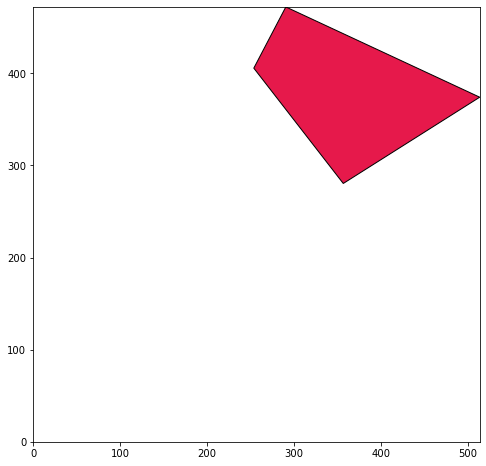

In [32]:
a = (np.array([[253.67073494, 405.63902563],
[356.61177344, 280.43286361],
[513.59792774 ,374.09495392],
[290.50334159 ,472.1004617]]))
simpleDisplay(np.array([a]))

AttributeError: 'numpy.ndarray' object has no attribute 'points'

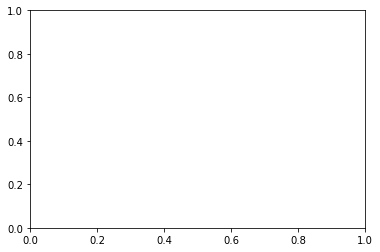

In [55]:
def simple_voronoi(vor, lim=None):
    # Make Voronoi Diagram 
    fig = voronoi_plot_2d(vor, show_points=True, show_vertices=True)
    # Configure figure 
    fig.set_size_inches(5,5)
    plt.axis("equal")
    if lim:
        plt.xlim(*lim)
        plt.ylim(*lim)
    plt.show()
simple_voronoi(a, lim=(0,500))

In [69]:
def gridS(nPoints):
    listofPoints = 500 * np.random.rand(nPoints, 2)
    listof = list([[0,0],[0,500],[500,500],[500,0]])
    listofPoints= list(listofPoints) + listof
    listofPoints=np.array(listofPoints)
    vor = Voronoi(listofPoints)
    voronoi_plot_2d(vor)
    plt.show()
    return vor
def getCycles(graph):
    cycles = nx.minimum_cycle_basis(graph)
    finalCycles = [cycles[0]]
    append = True
    for i in range(len(cycles)): 
        append = True
        for j in range(len(finalCycles)):
            if (intersection(cycles[i], finalCycles[j])!= []):
                append=False        
        if(append and cycles[i] not in finalCycles ):
            finalCycles.append(cycles[i])
    return finalCycles  

In [70]:
def aug(a):
    return a+1

In [70]:
baseGrid = [([shy.Polygon([(i,j),(i+1, j),(i+1,j+1),(i,j+1)]) for i in range(4) for j in range(4)])]
baseGridArr =700* np.array([([(i,j),(i+1, j),(i+1,j+1),(i,j+1)]) for i in range(4) for j in range(4)])
a = 

In [86]:
StudyMultipleMoving(baseGridArr)

[ 0.    -1.    -1.5    0.    -1.5    1.    -1.5    2.001  1.001 -1.5
 -0.5   -0.5   -0.5    0.5   -0.5    1.5    2.001 -1.5    0.5   -0.5
  0.5    0.5    0.5    1.5    3.002 -1.5    1.5   -0.5    1.5    0.5
  1.5    1.5  ]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [72]:
def isNeighboorsOf(shape1, shape2):
    #simpleDisplay(np.array([shape1,shape2]))
    for i in range(len(shape1)):
        for j in range(len(shape2)):
            if(isTouching(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)])):
                return True
    return False
def generateGridGraph(grid):
    G = nx.Graph()
    for i in range(len(grid)):
        G.add_node(i)
    for i in range(len(grid)):
        for j in range(len(grid)):
            if(i!=j and isNeighboorsOf(grid[i],grid[j])):
                G.add_edge(i,j)
                G.add_edge(j,i)
    return G


In [74]:
graph = generateGridGraph(baseGridArr)

<class 'list'>


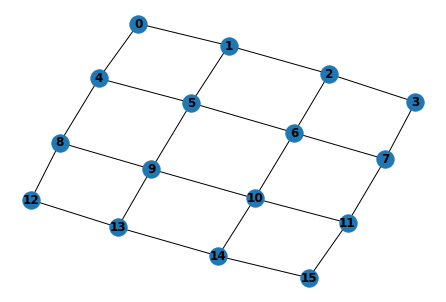

In [75]:
nx.draw(graph, with_labels=True, font_weight='bold')
print(type(nx.minimum_cycle_basis(graph)))


In [76]:
gridDesign(baseGridArr)

NameError: name 'intersection' is not defined

In [50]:
def designJoint2parts(p1,p2, width, height, distance_to_center=0.5 ):
    
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)

    nrows, ncols = p1.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [p1.dtype]}

    C = np.intersect1d(p1.view(dtype), p2.view(dtype))

    commonPoint = C.view(p1.dtype).reshape(-1, ncols) 
    JointAxis = np.asarray((commonPoint[1]-commonPoint[0])/np.linalg.norm(commonPoint[1]-commonPoint[0]))
    v = np.array(JointAxis[1],-JointAxis[0])
    

    midPoint = np.asarray((commonPoint[0]+commonPoint[1])*distance_to_center)
    
    polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
    p1 = shy.Polygon(p1).difference(polyJoint)
    p2 = shy.Polygon(p2).union(polyJoint)
    
    return list(p1.exterior.coords), list(p2.exterior.coords)

In [49]:
def designJointsPieces(nPartPiece, nParts = 4):
    parts = nPartPiece[0]
    normals = compute_normals_dict(parts)
    print(normals)
    for i in range(nParts):
        parts[i], parts[(i+1)%len(parts)] = designJoint2(parts[i], parts[(i+1)%len(parts)],  directions[(i+1)%len(parts)], width, height, distance_to_center=0.5, center= [0,0] )


        
        parts[i] = list(parts[i].exterior.coords)
        
    for i in range(len(parts)):
        parts[i] = correctPoints(parts[i]) 
    return 0

In [47]:
def gridDesign(grid):
    graph = generateGridGraph(grid)
    cycles = getCycles(graph)
    groupsOfPieces = []
    for i in range(len(cycles)):
        temp = []
        for j in range(len(cycles[i])):
            temp.append(grid[cycles[i][j]])
        groupsOfPieces.append(temp)
    groupsOfPieces = np.array(groupsOfPieces)
    
    p1 , p2 = designJoint2parts(groupsOfPieces[0][0],groupsOfPieces[0][1], 100, 100, distance_to_center=0.5 )
    parts = groupsOfPieces[0]

    
    a,b= designJoint2parts(parts[0],parts[1], 100, 100, distance_to_center=0.5 )

    
    
    
    simpleDisplay(np.array([a,b]))
    
    return 0

# Polygon <-> grid function

In [44]:
def createPieceFromPolygons(Ai):
    boundary = gpd.GeoSeries(cascaded_union(Ai))
    #boundary.plot(color = 'red')
    #plt.show()
    return boundary

def getCoordFromPolygon(polygon):
    d=shy.mapping(polygon)
    return (list(d.get('features')[0].get('geometry').get('coordinates')))

def getPolygonFromCoord(array):
    poly= [shy.Polygon(array[i]) for i in range(len(array))]
    return createPieceFromPolygons(poly)

def createPieceFromGrid(grid):
    grid = getCoordFromPolygon(getPolygonFromCoord(grid))
    grid = np.flip(grid, 1)
    grid = np.squeeze(grid,axis=0)
    return grid

In [83]:
pp = np.array([np.array([[700.   , 250.   ],
        [770.711, 179.289],
        [770.711, 379.289],
        [700.   , 450.   ],
        [700.   , 700.   ],
        [450.   , 700.   ],
        [379.289, 629.289],
        [179.289, 629.289],
        [250.   , 700.   ],
        [  0.   , 700.   ],
        [  0.   ,   0.   ],
        [700.   ,   0.   ]]), np.array([[ 450.   , 1400.   ],
        [ 520.711, 1470.711],
        [ 320.711, 1470.711],
        [ 250.   , 1400.   ],
        [   0.   , 1400.   ],
        [   0.   ,  700.   ],
        [ 250.   ,  700.   ],
        [ 179.289,  629.289],
        [ 379.289,  629.289],
        [ 450.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  950.   ],
        [ 629.289, 1020.711],
        [ 629.289, 1220.711],
        [ 700.   , 1150.   ],
        [ 700.   , 1400.   ]]), np.array([[1400.   ,  950.   ],
        [1470.711,  879.289],
        [1470.711, 1079.289],
        [1400.   , 1150.   ],
        [1400.   , 1400.   ],
        [1150.   , 1400.   ],
        [1079.289, 1329.289],
        [ 879.289, 1329.289],
        [ 950.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1150.   ],
        [ 629.289, 1220.711],
        [ 629.289, 1020.711],
        [ 700.   ,  950.   ],
        [ 700.   ,  700.   ],
        [ 950.   ,  700.   ],
        [1020.711,  770.711],
        [1220.711,  770.711],
        [1150.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1400.   ,  250.   ],
        [1470.711,  179.289],
        [1470.711,  379.289],
        [1400.   ,  450.   ],
        [1400.   ,  700.   ],
        [1150.   ,  700.   ],
        [1220.711,  770.711],
        [1020.711,  770.711],
        [ 950.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  450.   ],
        [ 770.711,  379.289],
        [ 770.711,  179.289],
        [ 700.   ,  250.   ],
        [ 700.   ,    0.   ],
        [1400.   ,    0.   ]]), np.array([[ 250.   , 1400.   ],
        [ 320.711, 1470.711],
        [ 520.711, 1470.711],
        [ 450.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1650.   ],
        [ 770.711, 1579.289],
        [ 770.711, 1779.289],
        [ 700.   , 1850.   ],
        [ 700.   , 2100.   ],
        [ 450.   , 2100.   ],
        [ 379.289, 2029.289],
        [ 179.289, 2029.289],
        [ 250.   , 2100.   ],
        [   0.   , 2100.   ],
        [   0.   , 1400.   ]]), np.array([[ 700.   , 2350.   ],
        [ 629.289, 2420.711],
        [ 629.289, 2620.711],
        [ 700.   , 2550.   ],
        [ 700.   , 2800.   ],
        [   0.   , 2800.   ],
        [   0.   , 2100.   ],
        [ 250.   , 2100.   ],
        [ 179.289, 2029.289],
        [ 379.289, 2029.289],
        [ 450.   , 2100.   ],
        [ 700.   , 2100.   ]]), np.array([[1400.   , 2350.   ],
        [1470.711, 2279.289],
        [1470.711, 2479.289],
        [1400.   , 2550.   ],
        [1400.   , 2800.   ],
        [ 700.   , 2800.   ],
        [ 700.   , 2550.   ],
        [ 629.289, 2620.711],
        [ 629.289, 2420.711],
        [ 700.   , 2350.   ],
        [ 700.   , 2100.   ],
        [ 950.   , 2100.   ],
        [1020.711, 2170.711],
        [1220.711, 2170.711],
        [1150.   , 2100.   ],
        [1400.   , 2100.   ]]), np.array([[1400.   , 1650.   ],
        [1470.711, 1579.289],
        [1470.711, 1779.289],
        [1400.   , 1850.   ],
        [1400.   , 2100.   ],
        [1150.   , 2100.   ],
        [1220.711, 2170.711],
        [1020.711, 2170.711],
        [ 950.   , 2100.   ],
        [ 700.   , 2100.   ],
        [ 700.   , 1850.   ],
        [ 770.711, 1779.289],
        [ 770.711, 1579.289],
        [ 700.   , 1650.   ],
        [ 700.   , 1400.   ],
        [ 950.   , 1400.   ],
        [ 879.289, 1329.289],
        [1079.289, 1329.289],
        [1150.   , 1400.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   ,  450.   ],
        [1470.711,  379.289],
        [1470.711,  179.289],
        [1400.   ,  250.   ],
        [1400.   ,    0.   ],
        [2100.   ,    0.   ],
        [2100.   ,  250.   ],
        [2170.711,  179.289],
        [2170.711,  379.289],
        [2100.   ,  450.   ],
        [2100.   ,  700.   ],
        [1850.   ,  700.   ],
        [1779.289,  629.289],
        [1579.289,  629.289],
        [1650.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1850.   , 1400.   ],
        [1920.711, 1470.711],
        [1720.711, 1470.711],
        [1650.   , 1400.   ],
        [1400.   , 1400.   ],
        [1400.   , 1150.   ],
        [1470.711, 1079.289],
        [1470.711,  879.289],
        [1400.   ,  950.   ],
        [1400.   ,  700.   ],
        [1650.   ,  700.   ],
        [1579.289,  629.289],
        [1779.289,  629.289],
        [1850.   ,  700.   ],
        [2100.   ,  700.   ],
        [2100.   ,  950.   ],
        [2029.289, 1020.711],
        [2029.289, 1220.711],
        [2100.   , 1150.   ],
        [2100.   , 1400.   ]]), np.array([[2550.   , 1400.   ],
        [2479.289, 1329.289],
        [2279.289, 1329.289],
        [2350.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1150.   ],
        [2029.289, 1220.711],
        [2029.289, 1020.711],
        [2100.   ,  950.   ],
        [2100.   ,  700.   ],
        [2350.   ,  700.   ],
        [2420.711,  770.711],
        [2620.711,  770.711],
        [2550.   ,  700.   ],
        [2800.   ,  700.   ],
        [2800.   , 1400.   ]]), np.array([[2100.   ,  450.   ],
        [2170.711,  379.289],
        [2170.711,  179.289],
        [2100.   ,  250.   ],
        [2100.   ,    0.   ],
        [2800.   ,    0.   ],
        [2800.   ,  700.   ],
        [2550.   ,  700.   ],
        [2620.711,  770.711],
        [2420.711,  770.711],
        [2350.   ,  700.   ],
        [2100.   ,  700.   ]]), np.array([[1650.   , 1400.   ],
        [1720.711, 1470.711],
        [1920.711, 1470.711],
        [1850.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1650.   ],
        [2170.711, 1579.289],
        [2170.711, 1779.289],
        [2100.   , 1850.   ],
        [2100.   , 2100.   ],
        [1850.   , 2100.   ],
        [1779.289, 2029.289],
        [1579.289, 2029.289],
        [1650.   , 2100.   ],
        [1400.   , 2100.   ],
        [1400.   , 1850.   ],
        [1470.711, 1779.289],
        [1470.711, 1579.289],
        [1400.   , 1650.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   , 2550.   ],
        [1470.711, 2479.289],
        [1470.711, 2279.289],
        [1400.   , 2350.   ],
        [1400.   , 2100.   ],
        [1650.   , 2100.   ],
        [1579.289, 2029.289],
        [1779.289, 2029.289],
        [1850.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 2350.   ],
        [2029.289, 2420.711],
        [2029.289, 2620.711],
        [2100.   , 2550.   ],
        [2100.   , 2800.   ],
        [1400.   , 2800.   ]]), np.array([[2350.   , 2100.   ],
        [2420.711, 2170.711],
        [2620.711, 2170.711],
        [2550.   , 2100.   ],
        [2800.   , 2100.   ],
        [2800.   , 2800.   ],
        [2100.   , 2800.   ],
        [2100.   , 2550.   ],
        [2029.289, 2620.711],
        [2029.289, 2420.711],
        [2100.   , 2350.   ],
        [2100.   , 2100.   ]]), np.array([[2350.   , 1400.   ],
        [2279.289, 1329.289],
        [2479.289, 1329.289],
        [2550.   , 1400.   ],
        [2800.   , 1400.   ],
        [2800.   , 2100.   ],
        [2550.   , 2100.   ],
        [2620.711, 2170.711],
        [2420.711, 2170.711],
        [2350.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 1850.   ],
        [2170.711, 1779.289],
        [2170.711, 1579.289],
        [2100.   , 1650.   ],
        [2100.   , 1400.   ]])])

[ 0.000e+00 -1.002e+00  1.002e+00 -0.000e+00  2.003e+00 -1.002e+00
  1.002e+00 -2.003e+00  2.002e+00  1.001e+00  3.003e+00  2.002e+00
  4.005e+00  1.000e+00  3.004e+00 -1.000e-03  2.003e+00 -3.005e+00
  3.005e+00 -2.003e+00  4.006e+00 -3.004e+00  3.004e+00 -4.006e+00
  4.006e+00 -1.002e+00  5.006e+00 -2.000e-03  6.007e+00 -1.002e+00
  5.006e+00 -2.003e+00]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [97]:
randomArray = np.array([np.array([[700.   , 250.   ],
        [771.802, 180.398],
        [771.802, 380.398],
        [700.   , 450.   ],
        [700.   , 700.   ],
        [450.   , 700.   ],
        [380.398, 628.198],
        [180.398, 628.198],
        [250.   , 700.   ],
        [  0.   , 700.   ],
        [  0.   ,   0.   ],
        [700.   ,   0.   ]]), np.array([[ 450.   , 1400.   ],
        [ 520.711, 1470.711],
        [ 320.711, 1470.711],
        [ 250.   , 1400.   ],
        [   0.   , 1400.   ],
        [   0.   ,  700.   ],
        [ 250.   ,  700.   ],
        [ 180.398,  628.198],
        [ 380.398,  628.198],
        [ 450.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  950.   ],
        [ 630.398, 1021.802],
        [ 630.398, 1221.802],
        [ 700.   , 1150.   ],
        [ 700.   , 1400.   ]]), np.array([[1400.   ,  950.   ],
        [1470.711,  879.289],
        [1470.711, 1079.289],
        [1400.   , 1150.   ],
        [1400.   , 1400.   ],
        [1150.   , 1400.   ],
        [1079.289, 1329.289],
        [ 879.289, 1329.289],
        [ 950.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1150.   ],
        [ 630.398, 1221.802],
        [ 630.398, 1021.802],
        [ 700.   ,  950.   ],
        [ 700.   ,  700.   ],
        [ 950.   ,  700.   ],
        [1021.802,  769.602],
        [1221.802,  769.602],
        [1150.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1400.   ,  250.   ],
        [1470.711,  179.289],
        [1470.711,  379.289],
        [1400.   ,  450.   ],
        [1400.   ,  700.   ],
        [1150.   ,  700.   ],
        [1221.802,  769.602],
        [1021.802,  769.602],
        [ 950.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  450.   ],
        [ 771.802,  380.398],
        [ 771.802,  180.398],
        [ 700.   ,  250.   ],
        [ 700.   ,    0.   ],
        [1400.   ,    0.   ]]), np.array([[ 250.   , 1400.   ],
        [ 320.711, 1470.711],
        [ 520.711, 1470.711],
        [ 450.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1650.   ],
        [ 782.931, 1594.121],
        [ 782.931, 1794.121],
        [ 700.   , 1850.   ],
        [ 700.   , 2100.   ],
        [ 450.   , 2100.   ],
        [ 394.121, 2017.069],
        [ 194.121, 2017.069],
        [ 250.   , 2100.   ],
        [   0.   , 2100.   ],
        [   0.   , 1400.   ]]), np.array([[ 700.   , 2350.   ],
        [ 644.121, 2432.931],
        [ 644.121, 2632.931],
        [ 700.   , 2550.   ],
        [ 700.   , 2800.   ],
        [   0.   , 2800.   ],
        [   0.   , 2100.   ],
        [ 250.   , 2100.   ],
        [ 194.121, 2017.069],
        [ 394.121, 2017.069],
        [ 450.   , 2100.   ],
        [ 700.   , 2100.   ]]), np.array([[1400.   , 2350.   ],
        [1470.711, 2279.289],
        [1470.711, 2479.289],
        [1400.   , 2550.   ],
        [1400.   , 2800.   ],
        [ 700.   , 2800.   ],
        [ 700.   , 2550.   ],
        [ 644.121, 2632.931],
        [ 644.121, 2432.931],
        [ 700.   , 2350.   ],
        [ 700.   , 2100.   ],
        [ 950.   , 2100.   ],
        [1032.931, 2155.879],
        [1232.931, 2155.879],
        [1150.   , 2100.   ],
        [1400.   , 2100.   ]]), np.array([[1400.   , 1650.   ],
        [1470.711, 1579.289],
        [1470.711, 1779.289],
        [1400.   , 1850.   ],
        [1400.   , 2100.   ],
        [1150.   , 2100.   ],
        [1232.931, 2155.879],
        [1032.931, 2155.879],
        [ 950.   , 2100.   ],
        [ 700.   , 2100.   ],
        [ 700.   , 1850.   ],
        [ 782.931, 1794.121],
        [ 782.931, 1594.121],
        [ 700.   , 1650.   ],
        [ 700.   , 1400.   ],
        [ 950.   , 1400.   ],
        [ 879.289, 1329.289],
        [1079.289, 1329.289],
        [1150.   , 1400.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   ,  450.   ],
        [1470.711,  379.289],
        [1470.711,  179.289],
        [1400.   ,  250.   ],
        [1400.   ,    0.   ],
        [2100.   ,    0.   ],
        [2100.   ,  250.   ],
        [2171.833,  180.43 ],
        [2171.833,  380.43 ],
        [2100.   ,  450.   ],
        [2100.   ,  700.   ],
        [1850.   ,  700.   ],
        [1780.43 ,  628.167],
        [1580.43 ,  628.167],
        [1650.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1850.   , 1400.   ],
        [1920.711, 1470.711],
        [1720.711, 1470.711],
        [1650.   , 1400.   ],
        [1400.   , 1400.   ],
        [1400.   , 1150.   ],
        [1470.711, 1079.289],
        [1470.711,  879.289],
        [1400.   ,  950.   ],
        [1400.   ,  700.   ],
        [1650.   ,  700.   ],
        [1580.43 ,  628.167],
        [1780.43 ,  628.167],
        [1850.   ,  700.   ],
        [2100.   ,  700.   ],
        [2100.   ,  950.   ],
        [2030.43 , 1021.833],
        [2030.43 , 1221.833],
        [2100.   , 1150.   ],
        [2100.   , 1400.   ]]), np.array([[2550.   , 1400.   ],
        [2479.289, 1329.289],
        [2279.289, 1329.289],
        [2350.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1150.   ],
        [2030.43 , 1221.833],
        [2030.43 , 1021.833],
        [2100.   ,  950.   ],
        [2100.   ,  700.   ],
        [2350.   ,  700.   ],
        [2421.833,  769.57 ],
        [2621.833,  769.57 ],
        [2550.   ,  700.   ],
        [2800.   ,  700.   ],
        [2800.   , 1400.   ]]), np.array([[2100.   ,  450.   ],
        [2171.833,  380.43 ],
        [2171.833,  180.43 ],
        [2100.   ,  250.   ],
        [2100.   ,    0.   ],
        [2800.   ,    0.   ],
        [2800.   ,  700.   ],
        [2550.   ,  700.   ],
        [2621.833,  769.57 ],
        [2421.833,  769.57 ],
        [2350.   ,  700.   ],
        [2100.   ,  700.   ]]), np.array([[1650.   , 1400.   ],
        [1720.711, 1470.711],
        [1920.711, 1470.711],
        [1850.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1650.   ],
        [2177.844, 1587.228],
        [2177.844, 1787.228],
        [2100.   , 1850.   ],
        [2100.   , 2100.   ],
        [1850.   , 2100.   ],
        [1787.228, 2022.156],
        [1587.228, 2022.156],
        [1650.   , 2100.   ],
        [1400.   , 2100.   ],
        [1400.   , 1850.   ],
        [1470.711, 1779.289],
        [1470.711, 1579.289],
        [1400.   , 1650.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   , 2550.   ],
        [1470.711, 2479.289],
        [1470.711, 2279.289],
        [1400.   , 2350.   ],
        [1400.   , 2100.   ],
        [1650.   , 2100.   ],
        [1587.228, 2022.156],
        [1787.228, 2022.156],
        [1850.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 2350.   ],
        [2037.228, 2427.844],
        [2037.228, 2627.844],
        [2100.   , 2550.   ],
        [2100.   , 2800.   ],
        [1400.   , 2800.   ]]), np.array([[2350.   , 2100.   ],
        [2427.844, 2162.772],
        [2627.844, 2162.772],
        [2550.   , 2100.   ],
        [2800.   , 2100.   ],
        [2800.   , 2800.   ],
        [2100.   , 2800.   ],
        [2100.   , 2550.   ],
        [2037.228, 2627.844],
        [2037.228, 2427.844],
        [2100.   , 2350.   ],
        [2100.   , 2100.   ]]), np.array([[2350.   , 1400.   ],
        [2279.289, 1329.289],
        [2479.289, 1329.289],
        [2550.   , 1400.   ],
        [2800.   , 1400.   ],
        [2800.   , 2100.   ],
        [2550.   , 2100.   ],
        [2627.844, 2162.772],
        [2427.844, 2162.772],
        [2350.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 1850.   ],
        [2177.844, 1787.228],
        [2177.844, 1587.228],
        [2100.   , 1650.   ],
        [2100.   , 1400.   ]])])

In [98]:
StudyMultipleMoving(randomArray, k=10)

[-0.     0.     0.    -0.     1.514 -1.514  1.515 -1.514  1.375  1.375
  4.14   5.062  6.161  2.368  3.106  0.077  3.624 -3.624  3.624 -3.624
  5.123 -5.123  5.123 -5.123  5.215 -2.032  7.506  1.023  9.382 -1.478
  6.929 -3.318]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [12]:
better = np.array([np.array([[700.   , 250.   ],
        [770.348, 178.928],
        [770.348, 378.928],
        [700.   , 450.   ],
        [700.   , 700.   ],
        [450.   , 700.   ],
        [378.928, 629.652],
        [178.928, 629.652],
        [250.   , 700.   ],
        [  0.   , 700.   ],
        [  0.   ,   0.   ],
        [700.   ,   0.   ]]), np.array([[ 450.   , 1400.   ],
        [ 450.   , 1500.   ],
        [ 250.   , 1500.   ],
        [ 250.   , 1400.   ],
        [   0.   , 1400.   ],
        [   0.   ,  700.   ],
        [ 250.   ,  700.   ],
        [ 178.928,  629.652],
        [ 378.928,  629.652],
        [ 450.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  950.   ],
        [ 628.928, 1020.348],
        [ 628.928, 1220.348],
        [ 700.   , 1150.   ],
        [ 700.   , 1400.   ]]), np.array([[1400.   ,  950.   ],
        [1470.711,  879.289],
        [1470.711, 1079.289],
        [1400.   , 1150.   ],
        [1400.   , 1400.   ],
        [1150.   , 1400.   ],
        [1150.   , 1300.   ],
        [ 950.   , 1300.   ],
        [ 950.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1150.   ],
        [ 628.928, 1220.348],
        [ 628.928, 1020.348],
        [ 700.   ,  950.   ],
        [ 700.   ,  700.   ],
        [ 950.   ,  700.   ],
        [1020.348,  771.072],
        [1220.348,  771.072],
        [1150.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1400.   ,  250.   ],
        [1470.711,  179.289],
        [1470.711,  379.289],
        [1400.   ,  450.   ],
        [1400.   ,  700.   ],
        [1150.   ,  700.   ],
        [1220.348,  771.072],
        [1020.348,  771.072],
        [ 950.   ,  700.   ],
        [ 700.   ,  700.   ],
        [ 700.   ,  450.   ],
        [ 770.348,  378.928],
        [ 770.348,  178.928],
        [ 700.   ,  250.   ],
        [ 700.   ,    0.   ],
        [1400.   ,    0.   ]]), np.array([[ 250.   , 1400.   ],
        [ 250.   , 1500.   ],
        [ 450.   , 1500.   ],
        [ 450.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 700.   , 1650.   ],
        [ 777.826, 1587.206],
        [ 777.826, 1787.206],
        [ 700.   , 1850.   ],
        [ 700.   , 2100.   ],
        [ 450.   , 2100.   ],
        [ 387.206, 2022.174],
        [ 187.206, 2022.174],
        [ 250.   , 2100.   ],
        [   0.   , 2100.   ],
        [   0.   , 1400.   ]]), np.array([[ 700.   , 2350.   ],
        [ 637.206, 2427.826],
        [ 637.206, 2627.826],
        [ 700.   , 2550.   ],
        [ 700.   , 2800.   ],
        [   0.   , 2800.   ],
        [   0.   , 2100.   ],
        [ 250.   , 2100.   ],
        [ 187.206, 2022.174],
        [ 387.206, 2022.174],
        [ 450.   , 2100.   ],
        [ 700.   , 2100.   ]]), np.array([[1400.   , 2350.   ],
        [1500.   , 2350.   ],
        [1500.   , 2550.   ],
        [1400.   , 2550.   ],
        [1400.   , 2800.   ],
        [ 700.   , 2800.   ],
        [ 700.   , 2550.   ],
        [ 637.206, 2627.826],
        [ 637.206, 2427.826],
        [ 700.   , 2350.   ],
        [ 700.   , 2100.   ],
        [ 950.   , 2100.   ],
        [1027.826, 2162.794],
        [1227.826, 2162.794],
        [1150.   , 2100.   ],
        [1400.   , 2100.   ]]), np.array([[1400.   , 1650.   ],
        [1500.   , 1650.   ],
        [1500.   , 1850.   ],
        [1400.   , 1850.   ],
        [1400.   , 2100.   ],
        [1150.   , 2100.   ],
        [1227.826, 2162.794],
        [1027.826, 2162.794],
        [ 950.   , 2100.   ],
        [ 700.   , 2100.   ],
        [ 700.   , 1850.   ],
        [ 777.826, 1787.206],
        [ 777.826, 1587.206],
        [ 700.   , 1650.   ],
        [ 700.   , 1400.   ],
        [ 950.   , 1400.   ],
        [ 950.   , 1300.   ],
        [1150.   , 1300.   ],
        [1150.   , 1400.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   ,  450.   ],
        [1470.711,  379.289],
        [1470.711,  179.289],
        [1400.   ,  250.   ],
        [1400.   ,    0.   ],
        [2100.   ,    0.   ],
        [2100.   ,  250.   ],
        [2169.114,  177.728],
        [2169.114,  377.728],
        [2100.   ,  450.   ],
        [2100.   ,  700.   ],
        [1850.   ,  700.   ],
        [1777.728,  630.886],
        [1577.728,  630.886],
        [1650.   ,  700.   ],
        [1400.   ,  700.   ]]), np.array([[1850.   , 1400.   ],
        [1894.721, 1489.443],
        [1694.721, 1489.443],
        [1650.   , 1400.   ],
        [1400.   , 1400.   ],
        [1400.   , 1150.   ],
        [1470.711, 1079.289],
        [1470.711,  879.289],
        [1400.   ,  950.   ],
        [1400.   ,  700.   ],
        [1650.   ,  700.   ],
        [1577.728,  630.886],
        [1777.728,  630.886],
        [1850.   ,  700.   ],
        [2100.   ,  700.   ],
        [2100.   ,  950.   ],
        [2027.728, 1019.114],
        [2027.728, 1219.114],
        [2100.   , 1150.   ],
        [2100.   , 1400.   ]]), np.array([[2550.   , 1400.   ],
        [2505.279, 1310.557],
        [2305.279, 1310.557],
        [2350.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1150.   ],
        [2027.728, 1219.114],
        [2027.728, 1019.114],
        [2100.   ,  950.   ],
        [2100.   ,  700.   ],
        [2350.   ,  700.   ],
        [2419.114,  772.272],
        [2619.114,  772.272],
        [2550.   ,  700.   ],
        [2800.   ,  700.   ],
        [2800.   , 1400.   ]]), np.array([[2100.   ,  450.   ],
        [2169.114,  377.728],
        [2169.114,  177.728],
        [2100.   ,  250.   ],
        [2100.   ,    0.   ],
        [2800.   ,    0.   ],
        [2800.   ,  700.   ],
        [2550.   ,  700.   ],
        [2619.114,  772.272],
        [2419.114,  772.272],
        [2350.   ,  700.   ],
        [2100.   ,  700.   ]]), np.array([[1650.   , 1400.   ],
        [1694.721, 1489.443],
        [1894.721, 1489.443],
        [1850.   , 1400.   ],
        [2100.   , 1400.   ],
        [2100.   , 1650.   ],
        [2178.015, 1587.44 ],
        [2178.015, 1787.44 ],
        [2100.   , 1850.   ],
        [2100.   , 2100.   ],
        [1850.   , 2100.   ],
        [1787.44 , 2021.985],
        [1587.44 , 2021.985],
        [1650.   , 2100.   ],
        [1400.   , 2100.   ],
        [1400.   , 1850.   ],
        [1500.   , 1850.   ],
        [1500.   , 1650.   ],
        [1400.   , 1650.   ],
        [1400.   , 1400.   ]]), np.array([[1400.   , 2550.   ],
        [1500.   , 2550.   ],
        [1500.   , 2350.   ],
        [1400.   , 2350.   ],
        [1400.   , 2100.   ],
        [1650.   , 2100.   ],
        [1587.44 , 2021.985],
        [1787.44 , 2021.985],
        [1850.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 2350.   ],
        [2037.44 , 2428.015],
        [2037.44 , 2628.015],
        [2100.   , 2550.   ],
        [2100.   , 2800.   ],
        [1400.   , 2800.   ]]), np.array([[2350.   , 2100.   ],
        [2428.015, 2162.56 ],
        [2628.015, 2162.56 ],
        [2550.   , 2100.   ],
        [2800.   , 2100.   ],
        [2800.   , 2800.   ],
        [2100.   , 2800.   ],
        [2100.   , 2550.   ],
        [2037.44 , 2628.015],
        [2037.44 , 2428.015],
        [2100.   , 2350.   ],
        [2100.   , 2100.   ]]), np.array([[2350.   , 1400.   ],
        [2305.279, 1310.557],
        [2505.279, 1310.557],
        [2550.   , 1400.   ],
        [2800.   , 1400.   ],
        [2800.   , 2100.   ],
        [2550.   , 2100.   ],
        [2628.015, 2162.56 ],
        [2428.015, 2162.56 ],
        [2350.   , 2100.   ],
        [2100.   , 2100.   ],
        [2100.   , 1850.   ],
        [2178.015, 1787.44 ],
        [2178.015, 1587.44 ],
        [2100.   , 1650.   ],
        [2100.   , 1400.   ]])])

In [38]:
StudyMultipleMoving(better)

[-0.    -1.34   1.34   0.     2.636 -1.296  1.296 -2.636  1.34   1.884
  4.817  6.521  6.724  3.978  2.636  0.912  3.072 -4.412  4.412 -3.072
  5.646 -4.307  4.307 -5.646  6.183  0.912  8.482  3.978 10.089  1.836
  7.52  -0.091]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [14]:
fourth = np.array([np.array([[ 700.   ,    0.   ],
        [   0.   ,    0.   ],
        [   0.   ,  700.   ],
        [   0.   , 1400.   ],
        [ 250.   , 1400.   ],
        [ 250.   , 1500.   ],
        [ 450.   , 1500.   ],
        [ 450.   , 1400.   ],
        [ 700.   , 1400.   ],
        [ 950.   , 1400.   ],
        [ 950.   , 1300.   ],
        [1150.   , 1300.   ],
        [1150.   , 1400.   ],
        [1400.   , 1400.   ],
        [1400.   , 1150.   ],
        [1470.711, 1079.289],
        [1470.711,  879.289],
        [1400.   ,  950.   ],
        [1400.   ,  700.   ],
        [1400.   ,  450.   ],
        [1470.711,  379.289],
        [1470.711,  179.289],
        [1400.   ,  250.   ],
        [1400.   ,    0.   ],
        [ 700.   ,    0.   ]]), np.array([[ 700., 1400.],
        [ 450., 1400.],
        [ 450., 1500.],
        [ 250., 1500.],
        [ 250., 1400.],
        [   0., 1400.],
        [   0., 2100.],
        [   0., 2800.],
        [ 700., 2800.],
        [1400., 2800.],
        [1400., 2550.],
        [1500., 2550.],
        [1500., 2350.],
        [1400., 2350.],
        [1400., 2100.],
        [1400., 1850.],
        [1500., 1850.],
        [1500., 1650.],
        [1400., 1650.],
        [1400., 1400.],
        [1150., 1400.],
        [1150., 1300.],
        [ 950., 1300.],
        [ 950., 1400.],
        [ 700., 1400.]]), np.array([[2100.   ,    0.   ],
        [1400.   ,    0.   ],
        [1400.   ,  250.   ],
        [1470.711,  179.289],
        [1470.711,  379.289],
        [1400.   ,  450.   ],
        [1400.   ,  700.   ],
        [1400.   ,  950.   ],
        [1470.711,  879.289],
        [1470.711, 1079.289],
        [1400.   , 1150.   ],
        [1400.   , 1400.   ],
        [1650.   , 1400.   ],
        [1694.721, 1489.443],
        [1894.721, 1489.443],
        [1850.   , 1400.   ],
        [2100.   , 1400.   ],
        [2350.   , 1400.   ],
        [2305.279, 1310.557],
        [2505.279, 1310.557],
        [2550.   , 1400.   ],
        [2800.   , 1400.   ],
        [2800.   ,  700.   ],
        [2800.   ,    0.   ],
        [2100.   ,    0.   ]]), np.array([[2100.   , 1400.   ],
        [1850.   , 1400.   ],
        [1894.721, 1489.443],
        [1694.721, 1489.443],
        [1650.   , 1400.   ],
        [1400.   , 1400.   ],
        [1400.   , 1650.   ],
        [1500.   , 1650.   ],
        [1500.   , 1850.   ],
        [1400.   , 1850.   ],
        [1400.   , 2100.   ],
        [1400.   , 2350.   ],
        [1500.   , 2350.   ],
        [1500.   , 2550.   ],
        [1400.   , 2550.   ],
        [1400.   , 2800.   ],
        [2100.   , 2800.   ],
        [2800.   , 2800.   ],
        [2800.   , 2100.   ],
        [2800.   , 1400.   ],
        [2550.   , 1400.   ],
        [2505.279, 1310.557],
        [2305.279, 1310.557],
        [2350.   , 1400.   ],
        [2100.   , 1400.   ]])])

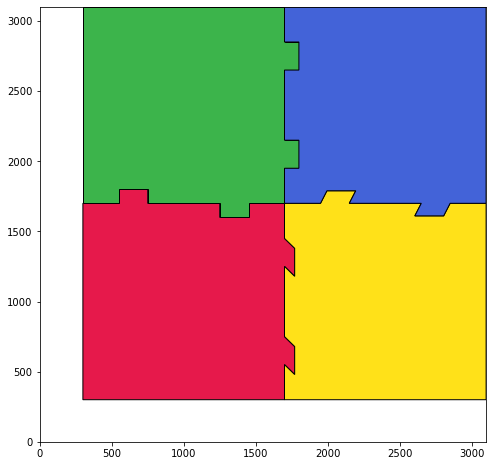

In [36]:
test = np.array([[[0,0],[10,0], [10,4], [11,3], [11,4,], [10,5], [10,10],[5,10], [5,9], [4,9], [4,10], [0,10]]])

In [10]:
test = np.array([[[0,0],[10,0], [10,4], [11,3], [11,4,], [10,5], [10,10],[5,10], [5,9], [4,9], [4,10], [0,10]],
                [[10,0], [20,0], [20,10], [15, 10], [16,11], [15, 11], [14, 10], [10,10], [10,5], [11,4], [11,3], [10,4]],
                [[20, 10], [20,20], [10,20], [10, 15], [11,15], [11,14], [10, 14],[10, 10], [14,10], [15,11], [16,11],[15,10]]
                ,[[10,10], [10,14], [11,14], [11,15],[10,15], [10,20], [0,20], [0,10], [4, 10], [4,9], [5,9], [5,10]]
                
                ])

In [33]:

    a = np.array([
np.array([
[ 2286.65 , 2060.128 ],
[ 2347.421 , 2029.743 ],
[ 2447.121 , 2037.486 ],
[ 2386.35 , 2067.872 ],
[ 2800.0 , 2100.0 ],
[ 2800.0 , 2800.0 ],
[ 2100.0 , 2800.0 ],
[ 2000.605 , 2461.969 ],
[ 2047.904 , 2498.757 ],
[ 2019.694 , 2402.819 ],
[ 1972.395 , 2366.031 ],
[ 1873.0 , 2028.0 ]
]),
np.array([
[ 1299.236 , 2473.279 ],
[ 1299.236 , 2592.039 ],
[ 1269.764 , 2496.48 ],
[ 1269.764 , 2377.721 ],
[ 1169.0 , 2051.0 ],
[ 1471.027 , 2041.133 ],
[ 1443.395 , 2077.054 ],
[ 1543.341 , 2073.789 ],
[ 1570.973 , 2037.867 ],
[ 1873.0 , 2028.0 ],
[ 1972.395 , 2366.031 ],
[ 2019.694 , 2402.819 ],
[ 2047.904 , 2498.757 ],
[ 2000.605 , 2461.969 ],
[ 2100.0 , 2800.0 ],
[ 1400.0 , 2800.0 ]
]),
np.array([
[ 1924.609 , 1325.357 ],
[ 1983.864 , 1266.103 ],
[ 2077.645 , 1231.389 ],
[ 2018.391 , 1290.643 ],
[ 2320.0 , 1179.0 ],
[ 2119.794 , 1559.257 ],
[ 2098.726 , 1524.145 ],
[ 2052.139 , 1612.63 ],
[ 2073.206 , 1647.743 ],
[ 1873.0 , 2028.0 ],
[ 1570.973 , 2037.867 ],
[ 1543.341 , 2073.789 ],
[ 1443.395 , 2077.054 ],
[ 1471.027 , 2041.133 ],
[ 1169.0 , 2051.0 ],
[ 1366.273 , 1784.203 ],
[ 1366.273 , 1843.073 ],
[ 1425.727 , 1762.666 ],
[ 1425.727 , 1703.797 ],
[ 1623.0 , 1437.0 ]
]),
np.array([
[ 2514.583 , 1268.589 ],
[ 2540.967 , 1242.205 ],
[ 2631.801 , 1284.027 ],
[ 2605.417 , 1310.411 ],
[ 2800.0 , 1400.0 ],
[ 2800.0 , 2100.0 ],
[ 2386.35 , 2067.872 ],
[ 2447.121 , 2037.486 ],
[ 2347.421 , 2029.743 ],
[ 2286.65 , 2060.128 ],
[ 1873.0 , 2028.0 ],
[ 2073.206 , 1647.743 ],
[ 2052.139 , 1612.63 ],
[ 2098.726 , 1524.145 ],
[ 2119.794 , 1559.257 ],
[ 2320.0 , 1179.0 ]
]),
np.array([
[ 1269.764 , 2377.721 ],
[ 1269.764 , 2496.48 ],
[ 1299.236 , 2592.039 ],
[ 1299.236 , 2473.279 ],
[ 1400.0 , 2800.0 ],
[ 700.0 , 2800.0 ],
[ 602.918 , 2520.728 ],
[ 651.889 , 2555.007 ],
[ 619.053 , 2460.552 ],
[ 570.082 , 2426.272 ],
[ 473.0 , 2147.0 ],
[ 771.469 , 2105.832 ],
[ 829.193 , 2062.539 ],
[ 928.256 , 2048.875 ],
[ 870.531 , 2092.168 ],
[ 1169.0 , 2051.0 ]
]),
np.array([
[ 186.745 , 2118.556 ],
[ 161.611 , 2151.231 ],
[ 261.12 , 2161.119 ],
[ 286.255 , 2128.444 ],
[ 473.0 , 2147.0 ],
[ 570.082 , 2426.272 ],
[ 619.053 , 2460.552 ],
[ 651.889 , 2555.007 ],
[ 602.918 , 2520.728 ],
[ 700.0 , 2800.0 ],
[ 0.0 , 2800.0 ],
[ 0.0 , 2100.0 ]
]),
np.array([
[ 282.269 , 1524.784 ],
[ 368.833 , 1524.784 ],
[ 460.294 , 1565.216 ],
[ 373.731 , 1565.216 ],
[ 656.0 , 1690.0 ],
[ 583.087 , 1872.083 ],
[ 560.919 , 1833.29 ],
[ 523.745 , 1926.124 ],
[ 545.913 , 1964.917 ],
[ 473.0 , 2147.0 ],
[ 286.255 , 2128.444 ],
[ 261.12 , 2161.119 ],
[ 161.611 , 2151.231 ],
[ 186.745 , 2118.556 ],
[ 0.0 , 2100.0 ],
[ 0.0 , 1400.0 ]
]),
np.array([
[ 1091.128 , 1576.156 ],
[ 952.851 , 1576.156 ],
[ 1049.594 , 1550.844 ],
[ 1187.872 , 1550.844 ],
[ 1623.0 , 1437.0 ],
[ 1425.727 , 1703.797 ],
[ 1425.727 , 1762.666 ],
[ 1366.273 , 1843.073 ],
[ 1366.273 , 1784.203 ],
[ 1169.0 , 2051.0 ],
[ 870.531 , 2092.168 ],
[ 928.256 , 2048.875 ],
[ 829.193 , 2062.539 ],
[ 771.469 , 2105.832 ],
[ 473.0 , 2147.0 ],
[ 545.913 , 1964.917 ],
[ 523.745 , 1926.124 ],
[ 560.919 , 1833.29 ],
[ 583.087 , 1872.083 ],
[ 656.0 , 1690.0 ]
]),
np.array([
[ 1603.547 , 1245.245 ],
[ 1647.681 , 1333.514 ],
[ 1637.588 , 1234.024 ],
[ 1593.453 , 1145.755 ],
[ 1574.0 , 954.0 ],
[ 1675.627 , 810.321 ],
[ 1645.353 , 792.512 ],
[ 1703.099 , 710.871 ],
[ 1733.373 , 728.679 ],
[ 1835.0 , 585.0 ],
[ 2045.877 , 843.27 ],
[ 2045.877 , 898.61 ],
[ 2109.123 , 976.07 ],
[ 2109.123 , 920.73 ],
[ 2320.0 , 1179.0 ],
[ 2018.391 , 1290.643 ],
[ 2077.645 , 1231.389 ],
[ 1983.864 , 1266.103 ],
[ 1924.609 , 1325.357 ],
[ 1623.0 , 1437.0 ]
]),
np.array([
[ 2605.417 , 1310.411 ],
[ 2631.801 , 1284.027 ],
[ 2540.967 , 1242.205 ],
[ 2514.583 , 1268.589 ],
[ 2320.0 , 1179.0 ],
[ 2109.123 , 920.73 ],
[ 2109.123 , 976.07 ],
[ 2045.877 , 898.61 ],
[ 2045.877 , 843.27 ],
[ 1835.0 , 585.0 ],
[ 2267.851 , 636.583 ],
[ 2345.788 , 681.119 ],
[ 2445.086 , 692.952 ],
[ 2367.149 , 648.417 ],
[ 2800.0 , 700.0 ],
[ 2800.0 , 1400.0 ]
]),
np.array([
[ 1946.869 , 338.045 ],
[ 1999.633 , 306.386 ],
[ 2040.896 , 215.296 ],
[ 1988.131 , 246.955 ],
[ 2100.0 , 0.0 ],
[ 2800.0 , 0.0 ],
[ 2800.0 , 700.0 ],
[ 2367.149 , 648.417 ],
[ 2445.086 , 692.952 ],
[ 2345.788 , 681.119 ],
[ 2267.851 , 636.583 ],
[ 1835.0 , 585.0 ]
]),
np.array([
[ 1495.971 , 526.189 ],
[ 1439.964 , 414.173 ],
[ 1422.021 , 315.796 ],
[ 1478.029 , 427.811 ],
[ 1400.0 , 0.0 ],
[ 2100.0 , 0.0 ],
[ 1988.131 , 246.955 ],
[ 2040.896 , 215.296 ],
[ 1999.633 , 306.386 ],
[ 1946.869 , 338.045 ],
[ 1835.0 , 585.0 ],
[ 1733.373 , 728.679 ],
[ 1703.099 , 710.871 ],
[ 1645.353 , 792.512 ],
[ 1675.627 , 810.321 ],
[ 1574.0 , 954.0 ]
]),
np.array([
[ 373.731 , 1565.216 ],
[ 460.294 , 1565.216 ],
[ 368.833 , 1524.784 ],
[ 282.269 , 1524.784 ],
[ 0.0 , 1400.0 ],
[ 0.0 , 700.0 ],
[ 196.412 , 747.7 ],
[ 167.762 , 704.725 ],
[ 264.938 , 728.325 ],
[ 293.588 , 771.3 ],
[ 490.0 , 819.0 ],
[ 563.639 , 1205.384 ],
[ 533.713 , 1235.31 ],
[ 552.434 , 1333.542 ],
[ 582.361 , 1303.616 ],
[ 656.0 , 1690.0 ]
]),
np.array([
[ 1187.872 , 1550.844 ],
[ 1049.594 , 1550.844 ],
[ 952.851 , 1576.156 ],
[ 1091.128 , 1576.156 ],
[ 656.0 , 1690.0 ],
[ 582.361 , 1303.616 ],
[ 552.434 , 1333.542 ],
[ 533.713 , 1235.31 ],
[ 563.639 , 1205.384 ],
[ 490.0 , 819.0 ],
[ 982.383 , 880.321 ],
[ 1028.528 , 921.338 ],
[ 1127.761 , 933.696 ],
[ 1081.617 , 892.679 ],
[ 1574.0 , 954.0 ],
[ 1593.453 , 1145.755 ],
[ 1637.588 , 1234.024 ],
[ 1647.681 , 1333.514 ],
[ 1603.547 , 1245.245 ],
[ 1623.0 , 1437.0 ]
]),
np.array([
[ 1478.029 , 427.811 ],
[ 1422.021 , 315.796 ],
[ 1439.964 , 414.173 ],
[ 1495.971 , 526.189 ],
[ 1574.0 , 954.0 ],
[ 1081.617 , 892.679 ],
[ 1127.761 , 933.696 ],
[ 1028.528 , 921.338 ],
[ 982.383 , 880.321 ],
[ 490.0 , 819.0 ],
[ 582.581 , 457.933 ],
[ 626.996 , 425.632 ],
[ 651.833 , 328.765 ],
[ 607.419 , 361.067 ],
[ 700.0 , 0.0 ],
[ 1400.0 , 0.0 ]
]),
np.array([
[ 293.588 , 771.3 ],
[ 264.938 , 728.325 ],
[ 167.762 , 704.725 ],
[ 196.412 , 747.7 ],
[ 0.0 , 700.0 ],
[ 0.0 , 0.0 ],
[ 700.0 , 0.0 ],
[ 607.419 , 361.067 ],
[ 651.833 , 328.765 ],
[ 626.996 , 425.632 ],
[ 582.581 , 457.933 ],
[ 490.0 , 819.0 ]
])
])

In [40]:
StudyMultipleMoving(a[12:16])

[ 0.     2.028  2.028  0.     0.512 -1.515 -1.516  0.006]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [41]:
p = np.array([
np.array([
[ 700.0 , 250.0 ],
[ 800.0 , 71.049 ],
[ 800.0 , 271.049 ],
[ 700.0 , 450.0 ],
[ 700.0 , 700.0 ],
[ 450.0 , 700.0 ],
[ 271.049 , 600.0 ],
[ 71.049 , 600.0 ],
[ 250.0 , 700.0 ],
[ 0.0 , 700.0 ],
[ 0.0 , 0.0 ],
[ 700.0 , 0.0 ]
]),
np.array([
[ 450.0 , 1400.0 ],
[ 350.0 , 1500.0 ],
[ 150.0 , 1500.0 ],
[ 250.0 , 1400.0 ],
[ 0.0 , 1400.0 ],
[ 0.0 , 700.0 ],
[ 250.0 , 700.0 ],
[ 71.049 , 600.0 ],
[ 271.049 , 600.0 ],
[ 450.0 , 700.0 ],
[ 700.0 , 700.0 ],
[ 700.0 , 950.0 ],
[ 600.0 , 1005.881 ],
[ 600.0 , 1205.881 ],
[ 700.0 , 1150.0 ],
[ 700.0 , 1400.0 ]
]),
np.array([
[ 950.0 , 700.0 ],
[ 1005.881 , 800.0 ],
[ 1205.881 , 800.0 ],
[ 1150.0 , 700.0 ],
[ 1400.0 , 700.0 ],
[ 1400.0 , 1400.0 ],
[ 700.0 , 1400.0 ],
[ 700.0 , 1150.0 ],
[ 600.0 , 1205.881 ],
[ 600.0 , 1005.881 ],
[ 700.0 , 950.0 ],
[ 700.0 , 700.0 ]
]),
np.array([
[ 1400.0 , 250.0 ],
[ 1500.0 , 350.0 ],
[ 1500.0 , 550.0 ],
[ 1400.0 , 450.0 ],
[ 1400.0 , 700.0 ],
[ 1150.0 , 700.0 ],
[ 1205.881 , 800.0 ],
[ 1005.881 , 800.0 ],
[ 950.0 , 700.0 ],
[ 700.0 , 700.0 ],
[ 700.0 , 450.0 ],
[ 800.0 , 271.049 ],
[ 800.0 , 71.049 ],
[ 700.0 , 250.0 ],
[ 700.0 , 0.0 ],
[ 1400.0 , 0.0 ]
]),
np.array([
[ 1400.0 , 450.0 ],
[ 1500.0 , 550.0 ],
[ 1500.0 , 350.0 ],
[ 1400.0 , 250.0 ],
[ 1400.0 , 0.0 ],
[ 2100.0 , 0.0 ],
[ 2100.0 , 250.0 ],
[ 2200.0 , 189.507 ],
[ 2200.0 , 389.507 ],
[ 2100.0 , 450.0 ],
[ 2100.0 , 700.0 ],
[ 1850.0 , 700.0 ],
[ 1789.507 , 600.0 ],
[ 1589.507 , 600.0 ],
[ 1650.0 , 700.0 ],
[ 1400.0 , 700.0 ]
]),
np.array([
[ 2100.0 , 950.0 ],
[ 2000.0 , 1115.309 ],
[ 2000.0 , 1315.309 ],
[ 2100.0 , 1150.0 ],
[ 2100.0 , 1400.0 ],
[ 1400.0 , 1400.0 ],
[ 1400.0 , 700.0 ],
[ 1650.0 , 700.0 ],
[ 1589.507 , 600.0 ],
[ 1789.507 , 600.0 ],
[ 1850.0 , 700.0 ],
[ 2100.0 , 700.0 ]
]),
np.array([
[ 2550.0 , 1400.0 ],
[ 2650.0 , 1300.0 ],
[ 2450.0 , 1300.0 ],
[ 2350.0 , 1400.0 ],
[ 2100.0 , 1400.0 ],
[ 2100.0 , 1150.0 ],
[ 2000.0 , 1315.309 ],
[ 2000.0 , 1115.309 ],
[ 2100.0 , 950.0 ],
[ 2100.0 , 700.0 ],
[ 2350.0 , 700.0 ],
[ 2515.309 , 800.0 ],
[ 2715.309 , 800.0 ],
[ 2550.0 , 700.0 ],
[ 2800.0 , 700.0 ],
[ 2800.0 , 1400.0 ]
]),
np.array([
[ 2100.0 , 450.0 ],
[ 2200.0 , 389.507 ],
[ 2200.0 , 189.507 ],
[ 2100.0 , 250.0 ],
[ 2100.0 , 0.0 ],
[ 2800.0 , 0.0 ],
[ 2800.0 , 700.0 ],
[ 2550.0 , 700.0 ],
[ 2715.309 , 800.0 ],
[ 2515.309 , 800.0 ],
[ 2350.0 , 700.0 ],
[ 2100.0 , 700.0 ]
]),
np.array([
[ 2100.0 , 1650.0 ],
[ 2200.0 , 1529.882 ],
[ 2200.0 , 1729.882 ],
[ 2100.0 , 1850.0 ],
[ 2100.0 , 2100.0 ],
[ 1850.0 , 2100.0 ],
[ 1729.882 , 2000.0 ],
[ 1529.882 , 2000.0 ],
[ 1650.0 , 2100.0 ],
[ 1400.0 , 2100.0 ],
[ 1400.0 , 1400.0 ],
[ 2100.0 , 1400.0 ]
]),
np.array([
[ 1400.0 , 2550.0 ],
[ 1500.0 , 2650.0 ],
[ 1500.0 , 2450.0 ],
[ 1400.0 , 2350.0 ],
[ 1400.0 , 2100.0 ],
[ 1650.0 , 2100.0 ],
[ 1529.882 , 2000.0 ],
[ 1729.882 , 2000.0 ],
[ 1850.0 , 2100.0 ],
[ 2100.0 , 2100.0 ],
[ 2100.0 , 2350.0 ],
[ 2000.0 , 2433.251 ],
[ 2000.0 , 2633.251 ],
[ 2100.0 , 2550.0 ],
[ 2100.0 , 2800.0 ],
[ 1400.0 , 2800.0 ]
]),
np.array([
[ 2350.0 , 2100.0 ],
[ 2433.251 , 2200.0 ],
[ 2633.251 , 2200.0 ],
[ 2550.0 , 2100.0 ],
[ 2800.0 , 2100.0 ],
[ 2800.0 , 2800.0 ],
[ 2100.0 , 2800.0 ],
[ 2100.0 , 2550.0 ],
[ 2000.0 , 2633.251 ],
[ 2000.0 , 2433.251 ],
[ 2100.0 , 2350.0 ],
[ 2100.0 , 2100.0 ]
]),
np.array([
[ 2350.0 , 1400.0 ],
[ 2450.0 , 1300.0 ],
[ 2650.0 , 1300.0 ],
[ 2550.0 , 1400.0 ],
[ 2800.0 , 1400.0 ],
[ 2800.0 , 2100.0 ],
[ 2550.0 , 2100.0 ],
[ 2633.251 , 2200.0 ],
[ 2433.251 , 2200.0 ],
[ 2350.0 , 2100.0 ],
[ 2100.0 , 2100.0 ],
[ 2100.0 , 1850.0 ],
[ 2200.0 , 1729.882 ],
[ 2200.0 , 1529.882 ],
[ 2100.0 , 1650.0 ],
[ 2100.0 , 1400.0 ]
]),
np.array([
[ 250.0 , 1400.0 ],
[ 150.0 , 1500.0 ],
[ 350.0 , 1500.0 ],
[ 450.0 , 1400.0 ],
[ 700.0 , 1400.0 ],
[ 700.0 , 1650.0 ],
[ 800.0 , 1570.689 ],
[ 800.0 , 1770.689 ],
[ 700.0 , 1850.0 ],
[ 700.0 , 2100.0 ],
[ 450.0 , 2100.0 ],
[ 370.689 , 2000.0 ],
[ 170.689 , 2000.0 ],
[ 250.0 , 2100.0 ],
[ 0.0 , 2100.0 ],
[ 0.0 , 1400.0 ]
]),
np.array([
[ 700.0 , 2350.0 ],
[ 600.0 , 2476.085 ],
[ 600.0 , 2676.085 ],
[ 700.0 , 2550.0 ],
[ 700.0 , 2800.0 ],
[ 0.0 , 2800.0 ],
[ 0.0 , 2100.0 ],
[ 250.0 , 2100.0 ],
[ 170.689 , 2000.0 ],
[ 370.689 , 2000.0 ],
[ 450.0 , 2100.0 ],
[ 700.0 , 2100.0 ]
]),
np.array([
[ 1400.0 , 2350.0 ],
[ 1500.0 , 2450.0 ],
[ 1500.0 , 2650.0 ],
[ 1400.0 , 2550.0 ],
[ 1400.0 , 2800.0 ],
[ 700.0 , 2800.0 ],
[ 700.0 , 2550.0 ],
[ 600.0 , 2676.085 ],
[ 600.0 , 2476.085 ],
[ 700.0 , 2350.0 ],
[ 700.0 , 2100.0 ],
[ 950.0 , 2100.0 ],
[ 1076.085 , 2200.0 ],
[ 1276.085 , 2200.0 ],
[ 1150.0 , 2100.0 ],
[ 1400.0 , 2100.0 ]
]),
np.array([
[ 700.0 , 1850.0 ],
[ 800.0 , 1770.689 ],
[ 800.0 , 1570.689 ],
[ 700.0 , 1650.0 ],
[ 700.0 , 1400.0 ],
[ 1400.0 , 1400.0 ],
[ 1400.0 , 2100.0 ],
[ 1150.0 , 2100.0 ],
[ 1276.085 , 2200.0 ],
[ 1076.085 , 2200.0 ],
[ 950.0 , 2100.0 ],
[ 700.0 , 2100.0 ]
])
])

In [42]:
StudyMultipleMoving(p)

[ 0.    -2.109  3.796  0.     5.452 -0.92   2.395 -6.421  4.163 -4.653
  7.162  0.744  9.528 -3.515  5.821 -5.574  4.614  2.099  7.361  4.16
  9.28   2.72   6.714 -0.701  2.106  1.69   4.591  5.004  6.14   2.939
  3.291  0.802]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [45]:
pp = np.array([
np.array([
[ 373.731 , 1565.216 ],
[ 400.267 , 1538.68 ],
[ 308.806 , 1498.247 ],
[ 282.269 , 1524.784 ],
[ 0.0 , 1400.0 ],
[ 0.0 , 700.0 ],
[ 196.412 , 747.7 ],
[ 167.762 , 704.725 ],
[ 264.938 , 728.325 ],
[ 293.588 , 771.3 ],
[ 490.0 , 819.0 ],
[ 563.639 , 1205.384 ],
[ 533.713 , 1235.31 ],
[ 552.434 , 1333.542 ],
[ 582.361 , 1303.616 ],
[ 656.0 , 1690.0 ]
]),
np.array([
[ 1593.453 , 1145.755 ],
[ 1632.605 , 1184.907 ],
[ 1642.698 , 1284.396 ],
[ 1603.547 , 1245.245 ],
[ 1623.0 , 1437.0 ],
[ 1187.872 , 1550.844 ],
[ 1236.869 , 1501.847 ],
[ 1140.126 , 1527.158 ],
[ 1091.128 , 1576.156 ],
[ 656.0 , 1690.0 ],
[ 582.361 , 1303.616 ],
[ 552.434 , 1333.542 ],
[ 533.713 , 1235.31 ],
[ 563.639 , 1205.384 ],
[ 490.0 , 819.0 ],
[ 982.383 , 880.321 ],
[ 1028.528 , 921.338 ],
[ 1127.761 , 933.696 ],
[ 1081.617 , 892.679 ],
[ 1574.0 , 954.0 ]
]),
np.array([
[ 1478.029 , 427.811 ],
[ 1434.515 , 384.298 ],
[ 1452.458 , 482.675 ],
[ 1495.971 , 526.189 ],
[ 1574.0 , 954.0 ],
[ 1081.617 , 892.679 ],
[ 1127.761 , 933.696 ],
[ 1028.528 , 921.338 ],
[ 982.383 , 880.321 ],
[ 490.0 , 819.0 ],
[ 582.581 , 457.933 ],
[ 626.996 , 425.632 ],
[ 651.833 , 328.765 ],
[ 607.419 , 361.067 ],
[ 700.0 , 0.0 ],
[ 1400.0 , 0.0 ]
]),
np.array([
[ 293.588 , 771.3 ],
[ 264.938 , 728.325 ],
[ 167.762 , 704.725 ],
[ 196.412 , 747.7 ],
[ 0.0 , 700.0 ],
[ 0.0 , 0.0 ],
[ 700.0 , 0.0 ],
[ 607.419 , 361.067 ],
[ 651.833 , 328.765 ],
[ 626.996 , 425.632 ],
[ 582.581 , 457.933 ],
[ 490.0 , 819.0 ]
]),
np.array([
[ 2018.391 , 1290.643 ],
[ 2077.645 , 1231.389 ],
[ 1983.864 , 1266.103 ],
[ 1924.609 , 1325.357 ],
[ 1623.0 , 1437.0 ],
[ 1603.547 , 1245.245 ],
[ 1642.698 , 1284.396 ],
[ 1632.605 , 1184.907 ],
[ 1593.453 , 1145.755 ],
[ 1574.0 , 954.0 ],
[ 1675.627 , 810.321 ],
[ 1645.353 , 792.512 ],
[ 1703.099 , 710.871 ],
[ 1733.373 , 728.679 ],
[ 1835.0 , 585.0 ],
[ 2045.877 , 843.27 ],
[ 2045.877 , 898.61 ],
[ 2109.123 , 976.07 ],
[ 2109.123 , 920.73 ],
[ 2320.0 , 1179.0 ]
]),
np.array([
[ 2605.417 , 1310.411 ],
[ 2631.801 , 1284.027 ],
[ 2540.967 , 1242.205 ],
[ 2514.583 , 1268.589 ],
[ 2320.0 , 1179.0 ],
[ 2109.123 , 920.73 ],
[ 2109.123 , 976.07 ],
[ 2045.877 , 898.61 ],
[ 2045.877 , 843.27 ],
[ 1835.0 , 585.0 ],
[ 2267.851 , 636.583 ],
[ 2345.788 , 681.119 ],
[ 2445.086 , 692.952 ],
[ 2367.149 , 648.417 ],
[ 2800.0 , 700.0 ],
[ 2800.0 , 1400.0 ]
]),
np.array([
[ 1946.869 , 338.045 ],
[ 1999.633 , 306.386 ],
[ 2040.896 , 215.296 ],
[ 1988.131 , 246.955 ],
[ 2100.0 , 0.0 ],
[ 2800.0 , 0.0 ],
[ 2800.0 , 700.0 ],
[ 2367.149 , 648.417 ],
[ 2445.086 , 692.952 ],
[ 2345.788 , 681.119 ],
[ 2267.851 , 636.583 ],
[ 1835.0 , 585.0 ]
]),
np.array([
[ 1495.971 , 526.189 ],
[ 1452.458 , 482.675 ],
[ 1434.515 , 384.298 ],
[ 1478.029 , 427.811 ],
[ 1400.0 , 0.0 ],
[ 2100.0 , 0.0 ],
[ 1988.131 , 246.955 ],
[ 2040.896 , 215.296 ],
[ 1999.633 , 306.386 ],
[ 1946.869 , 338.045 ],
[ 1835.0 , 585.0 ],
[ 1733.373 , 728.679 ],
[ 1703.099 , 710.871 ],
[ 1645.353 , 792.512 ],
[ 1675.627 , 810.321 ],
[ 1574.0 , 954.0 ]
]),
np.array([
[ 2286.65 , 2060.128 ],
[ 2347.421 , 2029.743 ],
[ 2447.121 , 2037.486 ],
[ 2386.35 , 2067.872 ],
[ 2800.0 , 2100.0 ],
[ 2800.0 , 2800.0 ],
[ 2100.0 , 2800.0 ],
[ 2000.605 , 2461.969 ],
[ 2047.904 , 2498.757 ],
[ 2019.694 , 2402.819 ],
[ 1972.395 , 2366.031 ],
[ 1873.0 , 2028.0 ]
]),
np.array([
[ 1299.236 , 2473.279 ],
[ 1246.275 , 2420.319 ],
[ 1216.804 , 2324.76 ],
[ 1269.764 , 2377.721 ],
[ 1169.0 , 2051.0 ],
[ 1471.027 , 2041.133 ],
[ 1443.395 , 2077.054 ],
[ 1543.341 , 2073.789 ],
[ 1570.973 , 2037.867 ],
[ 1873.0 , 2028.0 ],
[ 1972.395 , 2366.031 ],
[ 2019.694 , 2402.819 ],
[ 2047.904 , 2498.757 ],
[ 2000.605 , 2461.969 ],
[ 2100.0 , 2800.0 ],
[ 1400.0 , 2800.0 ]
]),
np.array([
[ 1366.273 , 1784.203 ],
[ 1391.298 , 1809.228 ],
[ 1450.752 , 1728.822 ],
[ 1425.727 , 1703.797 ],
[ 1623.0 , 1437.0 ],
[ 1924.609 , 1325.357 ],
[ 1983.864 , 1266.103 ],
[ 2077.645 , 1231.389 ],
[ 2018.391 , 1290.643 ],
[ 2320.0 , 1179.0 ],
[ 2119.794 , 1559.257 ],
[ 2098.726 , 1524.145 ],
[ 2052.139 , 1612.63 ],
[ 2073.206 , 1647.743 ],
[ 1873.0 , 2028.0 ],
[ 1570.973 , 2037.867 ],
[ 1543.341 , 2073.789 ],
[ 1443.395 , 2077.054 ],
[ 1471.027 , 2041.133 ],
[ 1169.0 , 2051.0 ]
]),
np.array([
[ 2514.583 , 1268.589 ],
[ 2540.967 , 1242.205 ],
[ 2631.801 , 1284.027 ],
[ 2605.417 , 1310.411 ],
[ 2800.0 , 1400.0 ],
[ 2800.0 , 2100.0 ],
[ 2386.35 , 2067.872 ],
[ 2447.121 , 2037.486 ],
[ 2347.421 , 2029.743 ],
[ 2286.65 , 2060.128 ],
[ 1873.0 , 2028.0 ],
[ 2073.206 , 1647.743 ],
[ 2052.139 , 1612.63 ],
[ 2098.726 , 1524.145 ],
[ 2119.794 , 1559.257 ],
[ 2320.0 , 1179.0 ]
]),
np.array([
[ 1269.764 , 2377.721 ],
[ 1216.804 , 2324.76 ],
[ 1246.275 , 2420.319 ],
[ 1299.236 , 2473.279 ],
[ 1400.0 , 2800.0 ],
[ 700.0 , 2800.0 ],
[ 602.918 , 2520.728 ],
[ 651.889 , 2555.007 ],
[ 619.053 , 2460.552 ],
[ 570.082 , 2426.272 ],
[ 473.0 , 2147.0 ],
[ 771.469 , 2105.832 ],
[ 829.193 , 2062.539 ],
[ 928.256 , 2048.875 ],
[ 870.531 , 2092.168 ],
[ 1169.0 , 2051.0 ]
]),
np.array([
[ 186.745 , 2118.556 ],
[ 161.611 , 2151.231 ],
[ 261.12 , 2161.119 ],
[ 286.255 , 2128.444 ],
[ 473.0 , 2147.0 ],
[ 570.082 , 2426.272 ],
[ 619.053 , 2460.552 ],
[ 651.889 , 2555.007 ],
[ 602.918 , 2520.728 ],
[ 700.0 , 2800.0 ],
[ 0.0 , 2800.0 ],
[ 0.0 , 2100.0 ]
]),
np.array([
[ 282.269 , 1524.784 ],
[ 308.806 , 1498.247 ],
[ 400.267 , 1538.68 ],
[ 373.731 , 1565.216 ],
[ 656.0 , 1690.0 ],
[ 583.087 , 1872.083 ],
[ 560.919 , 1833.29 ],
[ 523.745 , 1926.124 ],
[ 545.913 , 1964.917 ],
[ 473.0 , 2147.0 ],
[ 286.255 , 2128.444 ],
[ 261.12 , 2161.119 ],
[ 161.611 , 2151.231 ],
[ 186.745 , 2118.556 ],
[ 0.0 , 2100.0 ],
[ 0.0 , 1400.0 ]
]),
np.array([
[ 1425.727 , 1703.797 ],
[ 1450.752 , 1728.822 ],
[ 1391.298 , 1809.228 ],
[ 1366.273 , 1784.203 ],
[ 1169.0 , 2051.0 ],
[ 870.531 , 2092.168 ],
[ 928.256 , 2048.875 ],
[ 829.193 , 2062.539 ],
[ 771.469 , 2105.832 ],
[ 473.0 , 2147.0 ],
[ 545.913 , 1964.917 ],
[ 523.745 , 1926.124 ],
[ 560.919 , 1833.29 ],
[ 583.087 , 1872.083 ],
[ 656.0 , 1690.0 ],
[ 1091.128 , 1576.156 ],
[ 1140.126 , 1527.158 ],
[ 1236.869 , 1501.847 ],
[ 1187.872 , 1550.844 ],
[ 1623.0 , 1437.0 ]
])
])

In [50]:
StudyMultipleMoving(pp[4:8])

[ 0.     2.607  0.    -0.    -5.936 -3.298 -8.282 -1.994]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…